In [2]:
#load libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
missing=pd.DataFrame({'missing_count':df.isnull().sum(),
                      'missing_percent':(df.isnull().sum()/len(df))*100})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [10]:
df['age']=df['age'].fillna(df['age'].mean())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.drop(columns=['deck'],inplace=True)
print("missing values after cleaning:",df.isnull().sum().sum())

missing values after cleaning: 2


In [11]:
missing=pd.DataFrame({'missing_count':df.isnull().sum(),
                      'missing_percent':(df.isnull().sum()/len(df))*100})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


In [12]:
#duplicates and data type check
print("duplicate rows:",df.duplicated().sum())
#convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()

duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


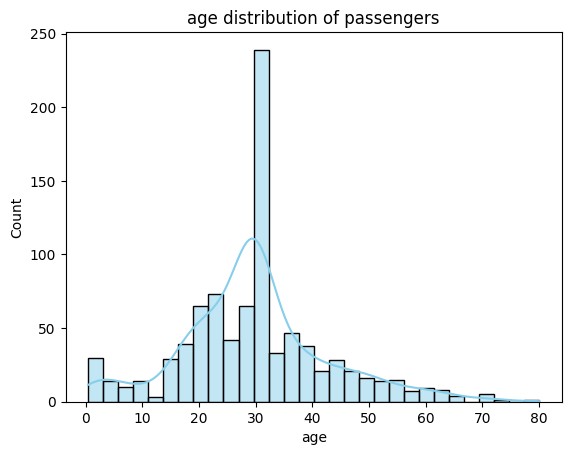

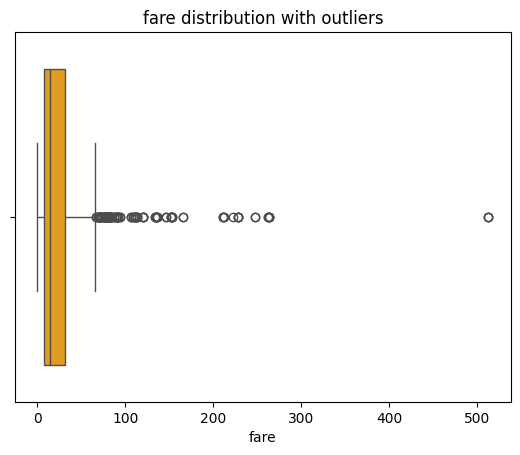

In [15]:
#univariate analysis-numerical features

num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#histogram:age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("age distribution of passengers")
plt.show()

#boxplot:fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("fare distribution with outliers")
plt.show()

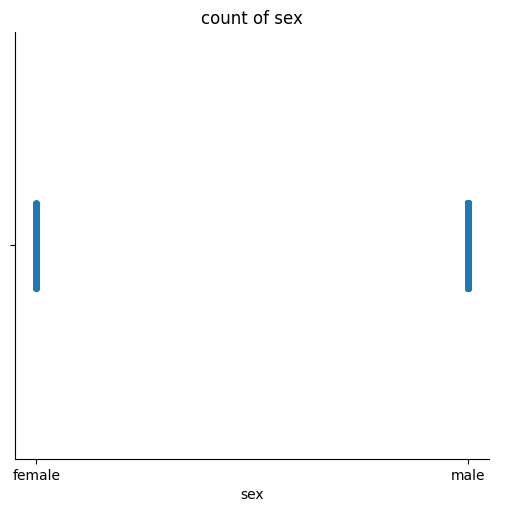

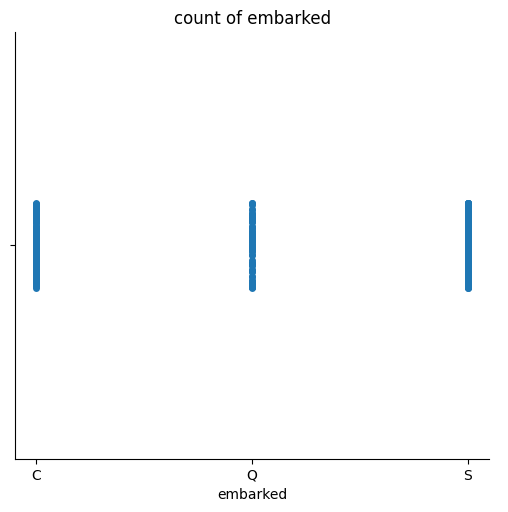

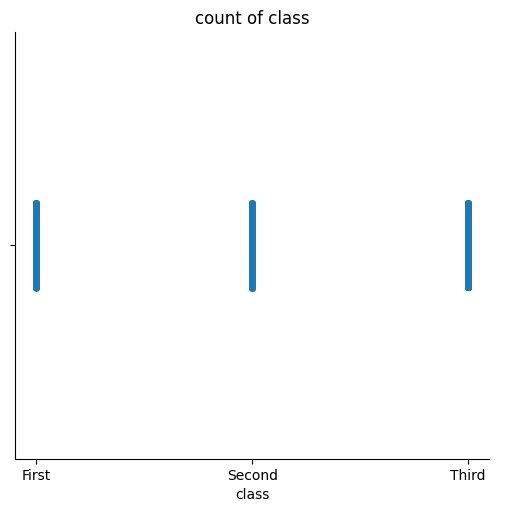

In [18]:
#univariate analysis-categorical features
cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"count of {col}")
    plt.show()

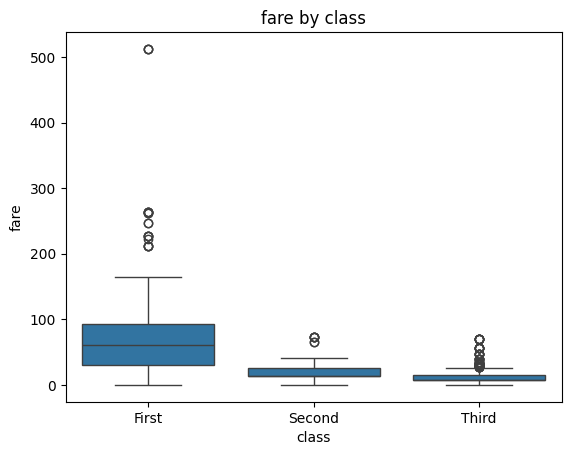

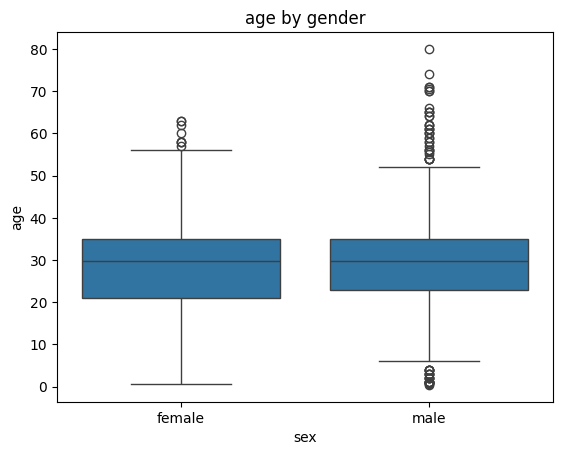

In [21]:
#bivariate analysis-numerical vs categorical
sns.boxplot(x='class',y='fare',data=df)
plt.title("fare by class")
plt.show()

sns.boxplot(x='sex',y='age',data=df)            
plt.title("age by gender")
plt.show()

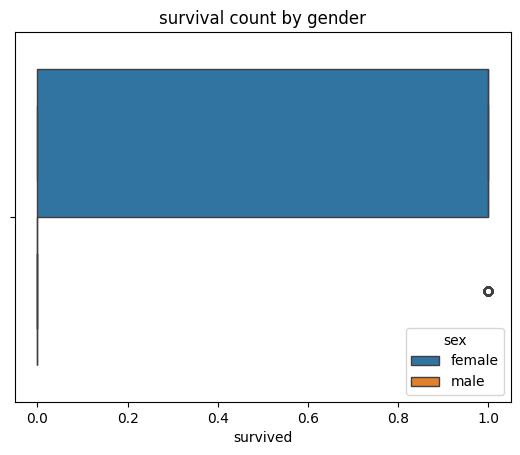

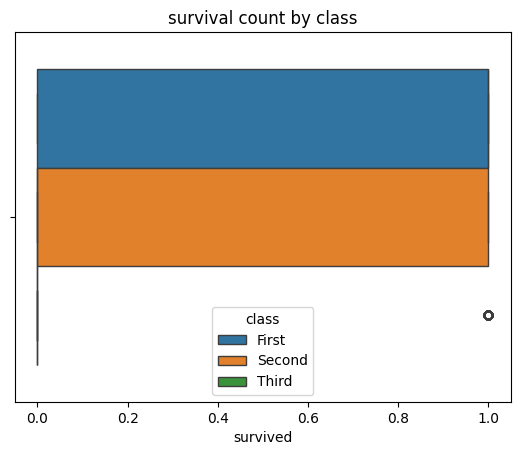

In [23]:
#bivariate-categorical vs categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("survival count by gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("survival count by class")
plt.show()

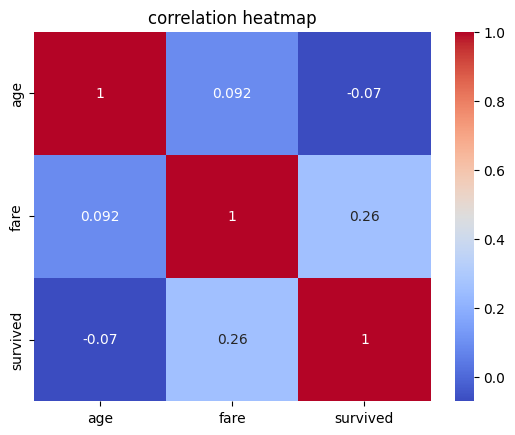

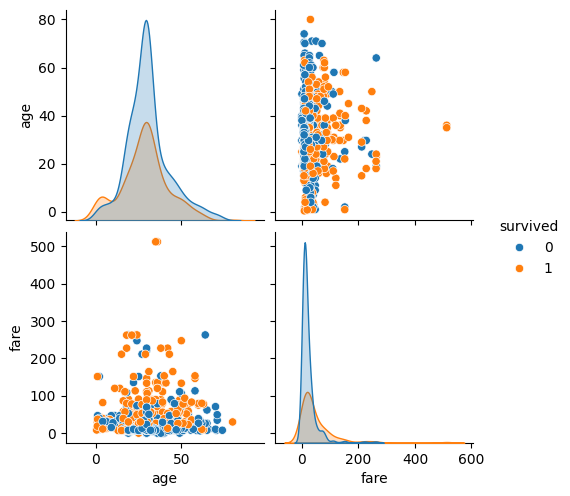

In [25]:
#correlation and multivariate analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

number of outliers in fare: 116


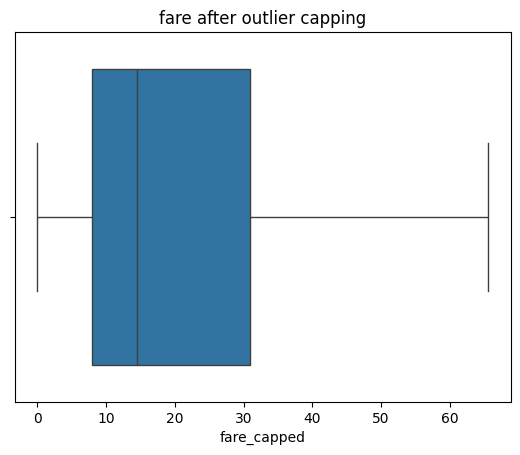

In [32]:
#outlier detection uisng IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

outliers=df[(df['fare']<lower) | (df['fare']>upper)]
print("number of outliers in fare:",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("fare after outlier capping")
plt.show()

Task 1 — Data Loading, Merging & Initial Inspection
1)Load all required CSV files into your notebook.
2)Merge them into one dataset using Store, Dept, and Date.
3)Display the first and last 10 rows.
4)Print:
    .shape
    .info()
    .describe()
5)Identify:
    Numerical columns
    Categorical columns
    Date columns
6)List all unique store types and departments.
7. Identify which columns may require cleaning or type conversion

In [44]:
features=pd.read_csv("C:\\Users\\spoor\\Downloads\\features.csv")
stores=pd.read_csv("C:\\Users\\spoor\\Downloads\\stores.csv")
train=pd.read_csv("C:\\Users\\spoor\\Downloads\\train.csv")

In [45]:
df = train.merge(stores, on="Store", how="left")
df = df.merge(features, on=["Store", "Date"], how="left")

In [46]:
df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [47]:
df.tail(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421560,45,98,2012-08-24,415.40,False,B,118221,72.62,3.834,7936.20,58.38,22.00,5518.07,2291.97,191.344887,8.684,False
421561,45,98,2012-08-31,346.04,False,B,118221,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False
421562,45,98,2012-09-07,352.44,True,B,118221,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,True
421563,45,98,2012-09-14,605.96,False,B,118221,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,191.699850,8.684,False
421564,45,98,2012-09-21,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684,False
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False


In [48]:
df.shape

(421570, 17)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [50]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [51]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [52]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')
Categorical columns: Index(['Date', 'Type'], dtype='object')


In [53]:
df['Date'] = pd.to_datetime(df['Date'])


In [54]:
date_cols = df.select_dtypes(include=['datetime'])
print("Date columns:", date_cols)


Date columns:              Date
0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
...           ...
421565 2012-09-28
421566 2012-10-05
421567 2012-10-12
421568 2012-10-19
421569 2012-10-26

[421570 rows x 1 columns]


In [55]:
print(df['Type'].unique())       # from stores.csv
print(df['Dept'].unique())


['A' 'B' 'C']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


Task 2 — Data Cleaning
1.Identify missing values using .isnull().sum().
2.Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.
3.Fill missing markdown-related fields with mean values.
4.Convert Date column to datetime format.
5.Remove duplicate rows.
6.Reset the index after cleaning.

In [56]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [57]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in markdown_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())


In [58]:
df['Date'] = pd.to_datetime(df['Date'])


In [59]:
df.drop_duplicates(inplace=True)


In [60]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,False


In [62]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

In [63]:
df.reset_index(drop=True, inplace=True)


Task 3 — Outlier Detection & Treatment
1.Detect outliers in:
    Weekly_Sales
    Temperature
    Fuel_Price
    CPI
2.Use:
    Boxplots
    IQR method
3.Identify if extreme sales spikes occur during holiday weeks.
4.Decide which outliers should be:
    Removed
    Capped
    Kept as business outliers

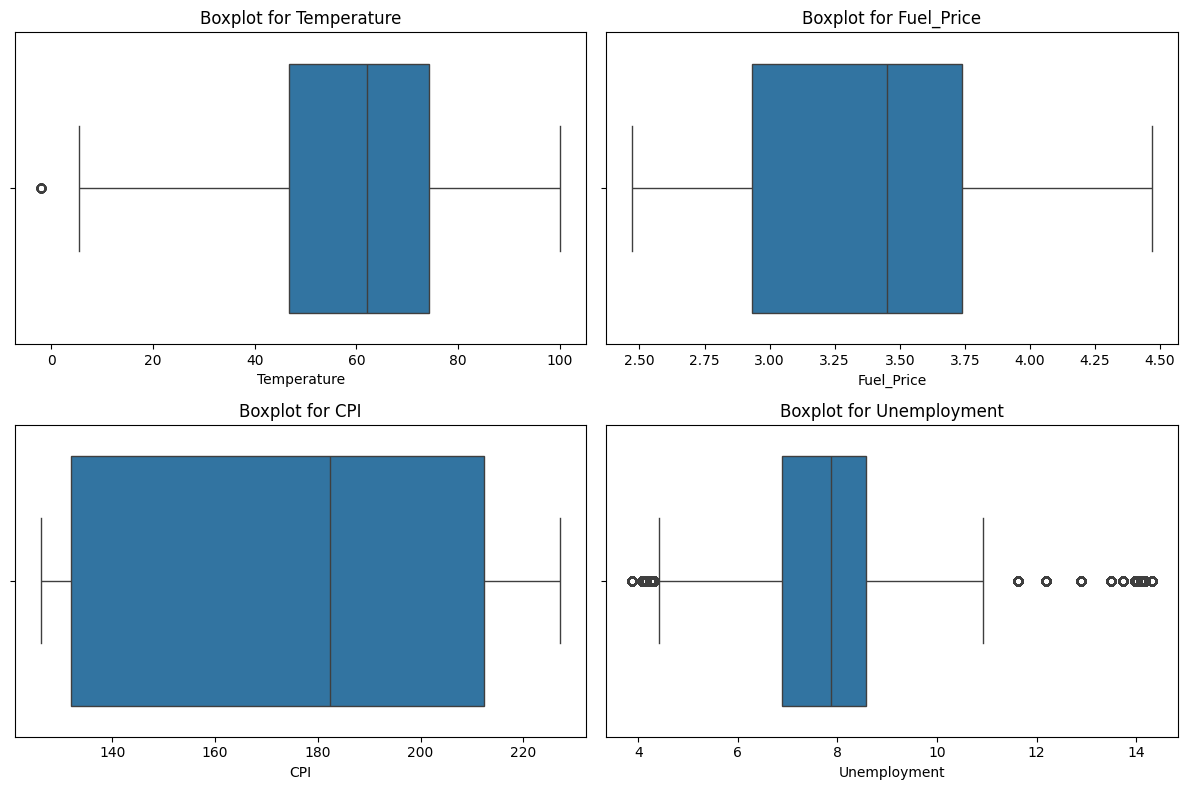

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_for_boxplot = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']  # Add Weekly_Sales later

plt.figure(figsize=(12,8))
for i, col in enumerate(cols_for_boxplot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()


In [65]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

for col in cols_for_boxplot:
    lower, upper = detect_outliers_iqr(df, col)
    print(f"{col} → Lower Bound: {lower}, Upper Bound: {upper}")
    print(df[(df[col] < lower) | (df[col] > upper)].shape)


Temperature → Lower Bound: 5.279999999999994, Upper Bound: 115.68
(69, 17)
Fuel_Price → Lower Bound: 1.7254999999999996, Upper Bound: 4.9455
(0, 17)
CPI → Lower Bound: 11.431177550000001, Upper Bound: 333.00848195000003
(0, 17)
Unemployment → Lower Bound: 4.369500000000001, Upper Bound: 11.093499999999999
(32114, 17)


In [67]:
holiday_sales = df[df['IsHoliday_x'] == True]
print("Holiday week summary:")
print(holiday_sales.describe())


Holiday week summary:
              Store          Dept                           Date  \
count  29661.000000  29661.000000                          29661   
mean      22.175078     44.361856  2011-06-04 16:21:21.683017984   
min        1.000000      1.000000            2010-02-12 00:00:00   
25%       11.000000     18.000000            2010-11-26 00:00:00   
50%       22.000000     38.000000            2011-09-09 00:00:00   
75%       33.000000     74.000000            2011-12-30 00:00:00   
max       45.000000     99.000000            2012-09-07 00:00:00   
std       12.784568     30.543188                            NaN   

        Weekly_Sales           Size   Temperature    Fuel_Price     MarkDown1  \
count   29661.000000   29661.000000  29661.000000  29661.000000  29661.000000   
mean    17035.823187  136859.369576     49.632550      3.230557   6841.514593   
min      -798.000000   34875.000000     10.240000      2.513000      2.800000   
25%      2078.540000   93638.000000     3

Task 4 — Univariate Analysis
Perform univariate analysis (one variable at a time):
Weekly sales distribution (Histogram + KDE).
Store type distribution (Count plot).
Distribution of Temperature, Fuel Price, CPI, Unemployment.
Distribution of sales during:
Holiday weeks
Non-holiday weeks
Identify top 10 departments by average weekly sales.

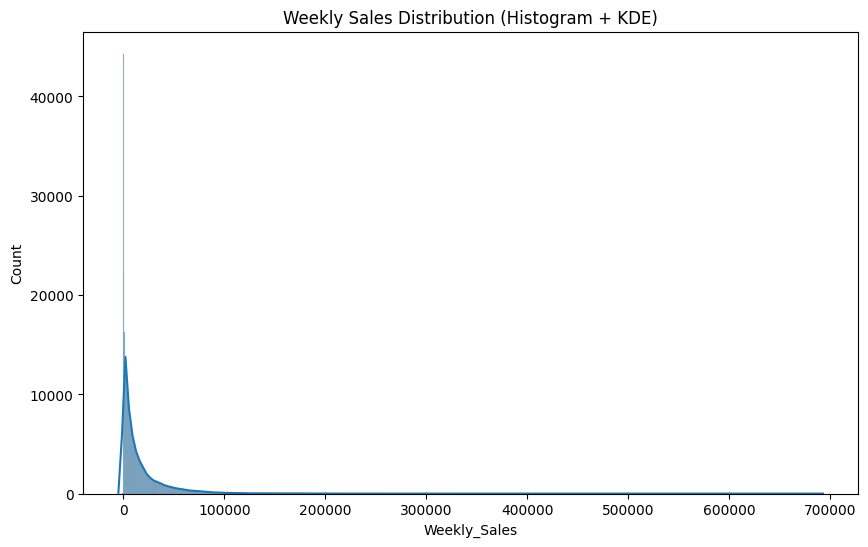

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Weekly Sales distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title("Weekly Sales Distribution (Histogram + KDE)")
plt.show()


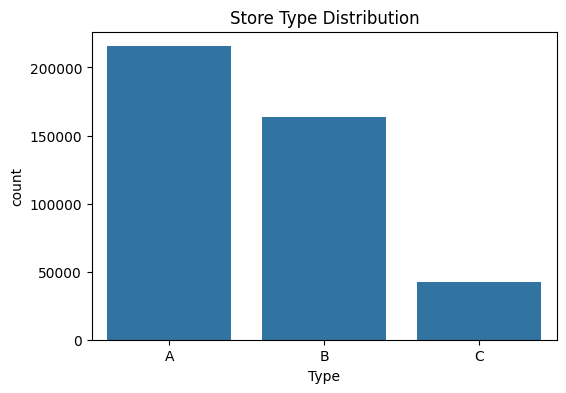

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type')
plt.title("Store Type Distribution")
plt.show()


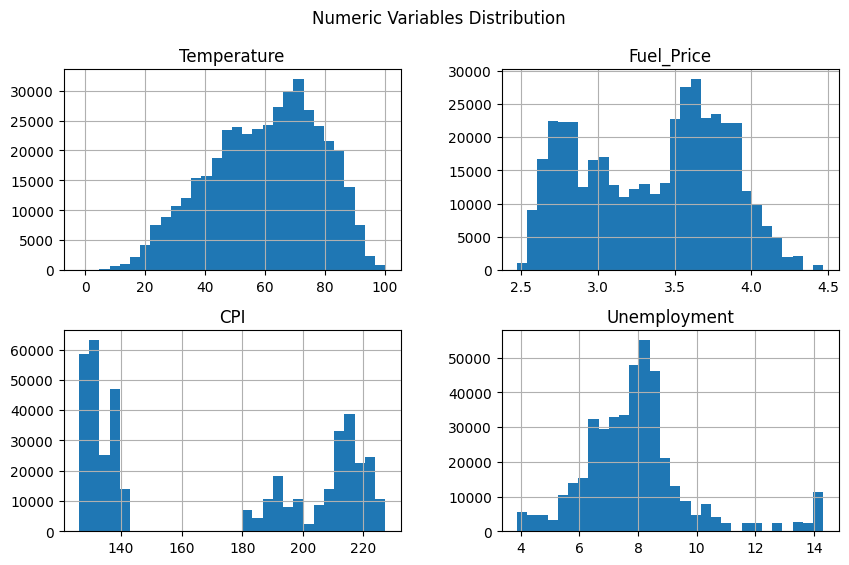

In [70]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df[cols].hist(figsize=(10,6), bins=30)
plt.suptitle("Numeric Variables Distribution")
plt.show()


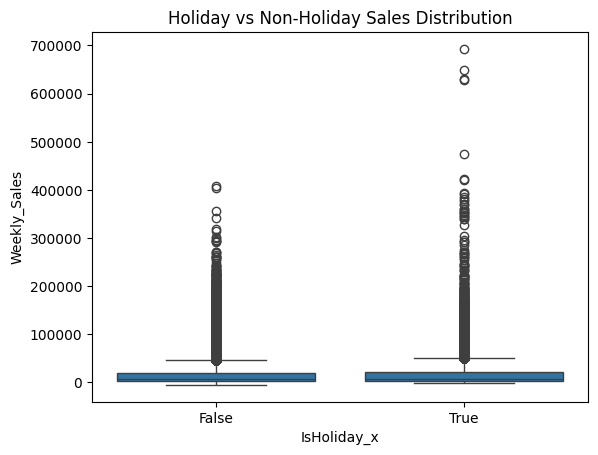

In [72]:
sns.boxplot(data=df, x='IsHoliday_x', y='Weekly_Sales')
plt.title("Holiday vs Non-Holiday Sales Distribution")
plt.show()


In [73]:
top10_dept = df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
print(top10_dept)


Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64


Task 5 — Bivariate Analysis
Study the relationship between two variables:
Relationship between Temperature & Weekly Sales (scatter plot).
Relationship between Fuel Price & Weekly Sales.
Weekly Sales vs. Store Type.
Weekly Sales vs. Holiday_Flag.
Compare sales between:
Top-performing store
Lowest-performing store

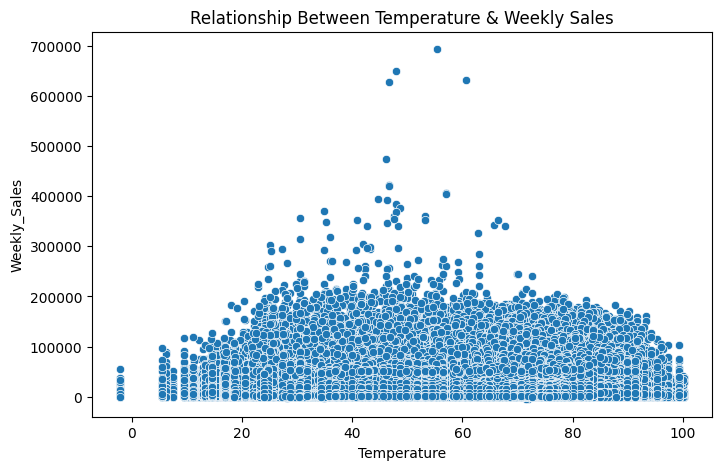

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title("Relationship Between Temperature & Weekly Sales")
plt.show()


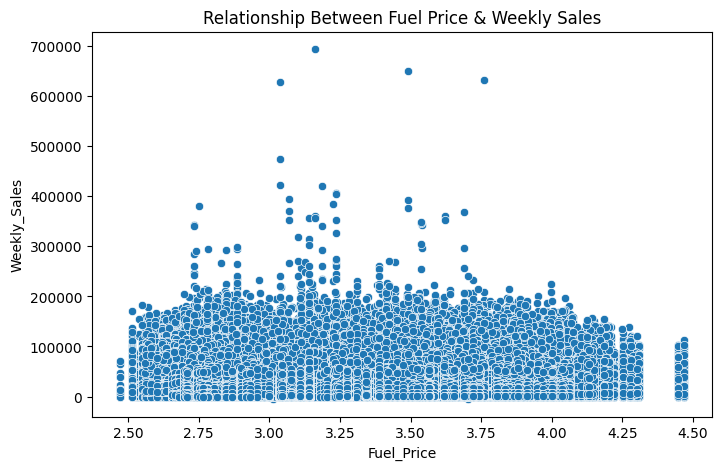

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales')
plt.title("Relationship Between Fuel Price & Weekly Sales")
plt.show()


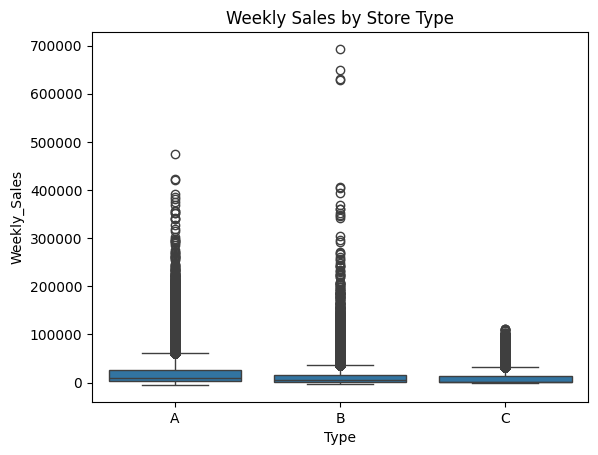

In [76]:
sns.boxplot(data=df, x='Type', y='Weekly_Sales')
plt.title("Weekly Sales by Store Type")
plt.show()


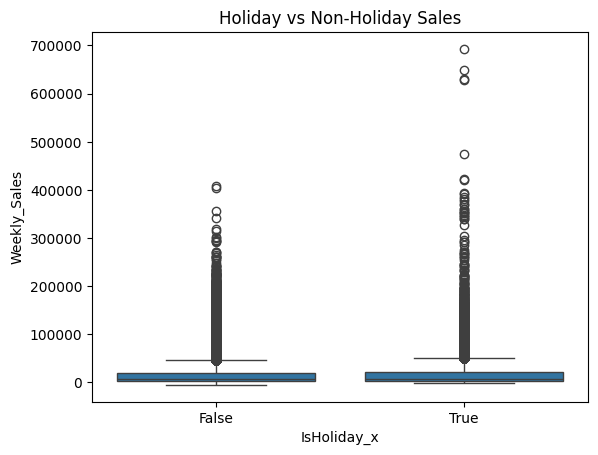

In [77]:
sns.boxplot(data=df, x='IsHoliday_x', y='Weekly_Sales')
plt.title("Holiday vs Non-Holiday Sales")
plt.show()


In [78]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

top_store = store_sales.head(1)
low_store = store_sales.tail(1)

print("Top-performing store:\n", top_store)
print("Lowest-performing store:\n", low_store)


Top-performing store:
 Store
20    29508.301592
Name: Weekly_Sales, dtype: float64
Lowest-performing store:
 Store
5    5053.415813
Name: Weekly_Sales, dtype: float64


Task 6 — Multivariate Analysis
Analyze more than two variables together:
Create a correlation heatmap for all numeric features.
Analyze store-level sales using:
Store Type
Store Size
Weekly Sales
Multivariate relationship:
Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)
Analyze whether discount markdowns influence sales when considering:
Date
Holiday weeks
Markdown values

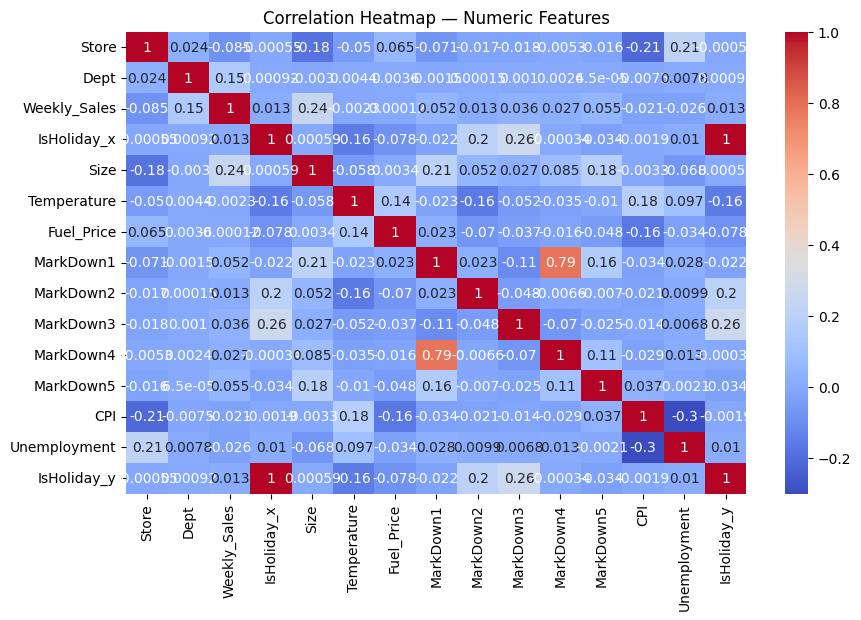

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap — Numeric Features")
plt.show()


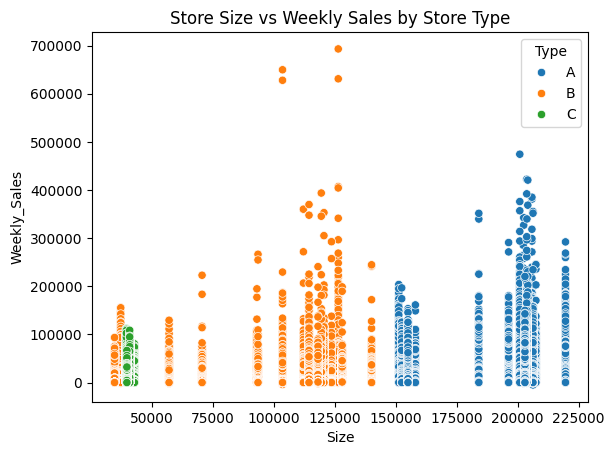

In [80]:
sns.scatterplot(data=df, x='Size', y='Weekly_Sales', hue='Type')
plt.title("Store Size vs Weekly Sales by Store Type")
plt.show()


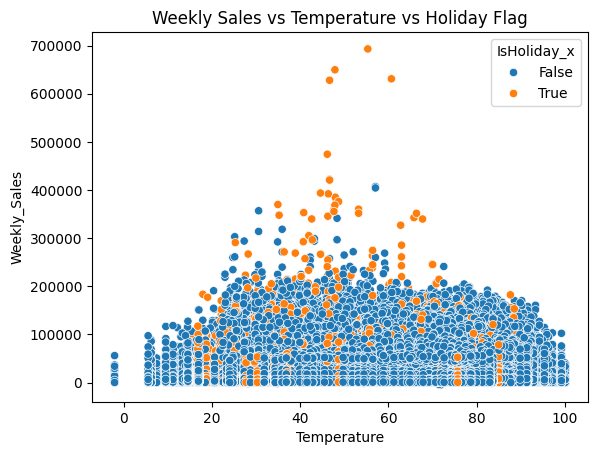

In [81]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='IsHoliday_x')
plt.title("Weekly Sales vs Temperature vs Holiday Flag")
plt.show()


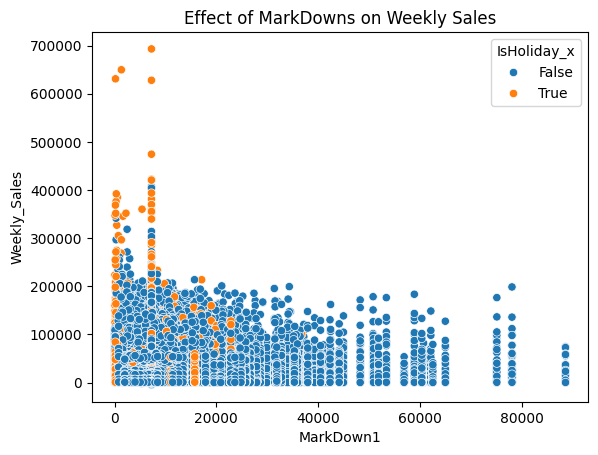

In [82]:
sns.scatterplot(data=df, x='MarkDown1', y='Weekly_Sales', hue='IsHoliday_x')
plt.title("Effect of MarkDowns on Weekly Sales")
plt.show()


Task 7 — Time Series Analysis
Convert Date to:
Year
Month
Week
Plot total weekly sales over time.
Plot monthly sales trends for:
Store with highest sales
Store with lowest sales
Identify seasonal patterns:
Which months show peak sales?
Which departments show seasonal demand?

In [83]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week


In [84]:
df.head(2)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,2010,2,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,True,2010,2,6


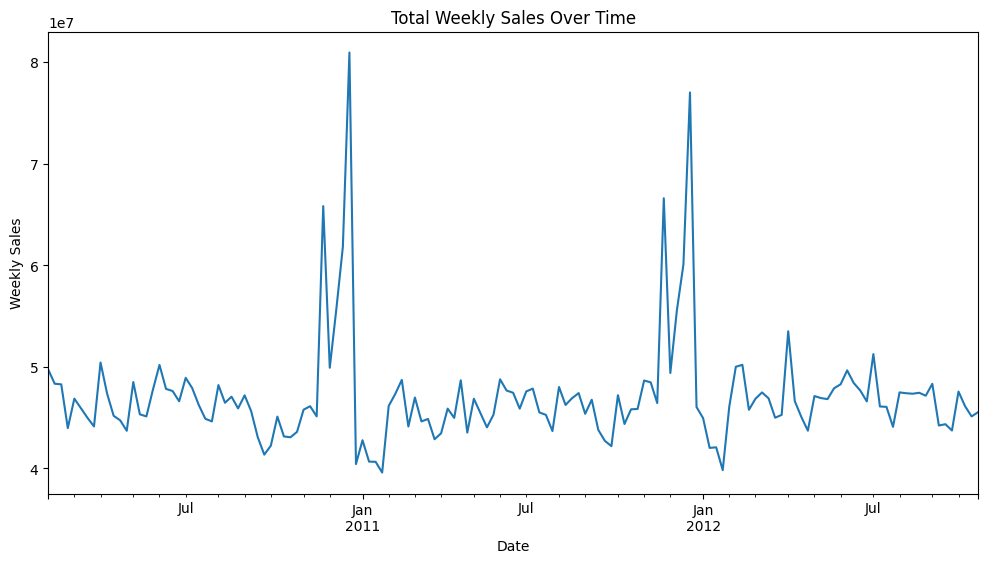

In [85]:
import matplotlib.pyplot as plt

weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(12,6))
weekly_sales.plot()
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.show()


In [86]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

top_store = store_sales.index[0]
bottom_store = store_sales.index[-1]

print("Top-performing store:", top_store)
print("Lowest-performing store:", bottom_store)


Top-performing store: 20
Lowest-performing store: 5


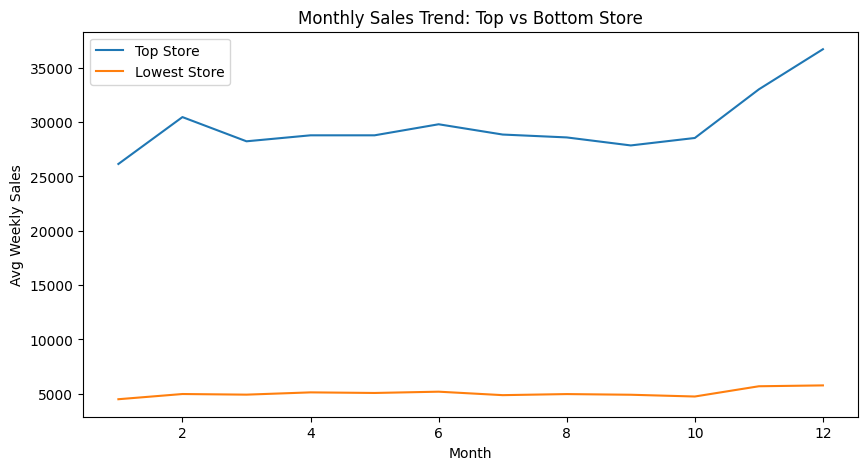

In [87]:
monthly_top = df[df['Store'] == top_store].groupby('Month')['Weekly_Sales'].mean()
monthly_bottom = df[df['Store'] == bottom_store].groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10,5))
monthly_top.plot(label='Top Store')
monthly_bottom.plot(label='Lowest Store')
plt.title("Monthly Sales Trend: Top vs Bottom Store")
plt.xlabel("Month")
plt.ylabel("Avg Weekly Sales")
plt.legend()
plt.show()


In [88]:
month_sales = df.groupby('Month')['Weekly_Sales'].mean().sort_values(ascending=False)
print("Peak sales months:\n", month_sales.head())


Peak sales months:
 Month
12    19355.702141
11    17491.031424
6     16326.137002
8     16062.516933
2     16008.779217
Name: Weekly_Sales, dtype: float64


In [89]:
dept_seasonal = df.groupby(['Dept','Month'])['Weekly_Sales'].mean().unstack()
print(dept_seasonal)


Month            1             2             3             4             5   \
Dept                                                                          
1      13665.363194  23439.498833  18478.219556  27969.288698  14168.030111   
2      39847.003639  43320.360593  43031.601094  42808.345698  42881.651852   
3      11149.947111   9464.377815   8296.513162   7961.761444   7583.878241   
4      25369.277750  25325.666222  24748.209487  25080.069127  25509.505463   
5      16895.285534  24145.523032  22450.608656  20723.475761  15088.308327   
...             ...           ...           ...           ...           ...   
95     63755.449639  66319.530981  67274.400222  68581.447873  72647.939500   
96     12627.161588  13483.545186  13556.987477  14407.006064  15532.728784   
97     13822.160028  13946.325448  13451.148077  13657.484206  14473.466705   
98      5812.466412   7237.474960   6635.873750   7020.293483   7138.545449   
99        17.328571    740.440676    143.188462     

Task 8 — Feature Engineering
Task 8A — Create New Columns
year, month, week → from date.
discount_effect = MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5
is_peak_season → True if month in {11, 12}.
normalized_sales = Weekly_Sales / Size

In [90]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

df['discount_effect'] = df[markdown_cols].sum(axis=1)


In [91]:
df['is_peak_season'] = df['Month'].isin([11, 12])


In [92]:
df['normalized_sales'] = df['Weekly_Sales'] / df['Size']


In [93]:
df.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
0,1,1,2010-02-05,24924.5,False,A,151315,42.31,2.572,7246.420196,...,4628.975079,211.096358,8.106,False,2010,2,5,20032.613536,False,0.164719


Task 8B — Filter Using Created Columns
Show all peak-season transactions where weekly_sales > 50,000.
Show all stores whose normalized_sales is in the top 10% percentile.
Show departments where discount_effect > median discount.
Filter rows where:
Temperature < 40
Fuel price > 3.5
Weekly sales between 20,000 and 60,000
is_peak_season = True

In [94]:
peak_sales = df[(df['is_peak_season'] == True) & (df['Weekly_Sales'] > 50000)]
print(peak_sales)


        Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
46          1     1 2010-12-24      55931.23        False    A  151315   
189         1     2 2010-12-24      59889.32        False    A  151315   
240         1     2 2011-12-16      51137.42        False    A  151315   
241         1     2 2011-12-23      65615.36        False    A  151315   
614         1     5 2010-11-26      70158.86         True    A  151315   
...       ...   ...        ...           ...          ...  ...     ...   
421193     45    95 2010-12-24      55185.25        False    B  118221   
421238     45    95 2011-11-04      53342.74        False    B  118221   
421243     45    95 2011-12-09      50575.14        False    B  118221   
421244     45    95 2011-12-16      50108.41        False    B  118221   
421245     45    95 2011-12-23      54017.86        False    B  118221   

        Temperature  Fuel_Price    MarkDown1  ...     MarkDown5         CPI  \
46            52.33       2.886 

In [95]:
threshold = df['normalized_sales'].quantile(0.90)

top_norm_sales = df[df['normalized_sales'] >= threshold]
print(top_norm_sales)


        Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
8           1     1 2010-04-02      57258.43        False    A  151315   
46          1     1 2010-12-24      55931.23        False    A  151315   
63          1     1 2011-04-22      50510.31        False    A  151315   
106         1     1 2012-02-17      54060.10        False    A  151315   
113         1     1 2012-04-06      57592.12        False    A  151315   
...       ...   ...        ...           ...          ...  ...     ...   
421285     45    95 2012-09-28      49380.11        False    B  118221   
421286     45    95 2012-10-05      50241.01        False    B  118221   
421287     45    95 2012-10-12      49334.77        False    B  118221   
421288     45    95 2012-10-19      48434.97        False    B  118221   
421289     45    95 2012-10-26      56017.47        False    B  118221   

        Temperature  Fuel_Price     MarkDown1  ...    MarkDown5         CPI  \
8             62.27       2.719 

In [96]:
median_discount = df['discount_effect'].median()

high_discount_depts = df[df['discount_effect'] > median_discount]
print(high_discount_depts)


        Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
92          1     1 2011-11-11      18689.54        False    A  151315   
94          1     1 2011-11-25      20911.25         True    A  151315   
95          1     1 2011-12-02      25293.49        False    A  151315   
96          1     1 2011-12-09      33305.92        False    A  151315   
99          1     1 2011-12-30      23350.88         True    A  151315   
...       ...   ...        ...           ...          ...  ...     ...   
421544     45    98 2012-05-04        694.25        False    B  118221   
421557     45    98 2012-08-03        516.46        False    B  118221   
421558     45    98 2012-08-10        727.49        False    B  118221   
421561     45    98 2012-08-31        346.04        False    B  118221   
421563     45    98 2012-09-14        605.96        False    B  118221   

        Temperature  Fuel_Price  MarkDown1  ...  MarkDown5         CPI  \
92            59.11       3.297   103

In [97]:
filtered_df = df[
    (df['Temperature'] < 40) &
    (df['Fuel_Price'] > 3.5) &
    (df['Weekly_Sales'].between(20000, 60000)) &
    (df['is_peak_season'] == True)
]

print(filtered_df)


        Store  Dept       Date  Weekly_Sales  IsHoliday_x Type   Size  \
59234       7     2 2011-11-04      21320.52        False    B  70713   
60235       7     9 2011-11-04      28969.99        False    B  70713   
60378       7    10 2011-11-04      28281.31        False    B  70713   
60379       7    10 2011-11-11      23758.50        False    B  70713   
60522       7    11 2011-11-11      20611.14        False    B  70713   
...       ...   ...        ...           ...          ...  ...    ...   
408186     44    38 2011-11-11      54238.48        False    C  39910   
410736     44    90 2011-11-11      34552.00        False    C  39910   
411022     44    92 2011-11-11      46554.78        False    C  39910   
411308     44    94 2011-11-11      20018.92        False    C  39910   
411451     44    95 2011-11-11      28510.10        False    C  39910   

        Temperature  Fuel_Price    MarkDown1  ...    MarkDown5         CPI  \
59234         23.41       3.527  7246.420196 

Task 8C — Grouping & Business Insights
Monthly average sales per store.
Total discount_effect per department.
Department with highest normalized_sales.
Compute store-wise revenue potential:
revenue_potential = Weekly_Sales * 52
Identify top 10 stores based on revenue potential.

In [98]:
monthly_avg_sales = df.groupby(['Store', 'Month'])['Weekly_Sales'].mean().reset_index()
print(monthly_avg_sales.head())


   Store  Month  Weekly_Sales
0      1      1  19586.960647
1      1      2  22497.470104
2      1      3  21750.978506
3      1      4  21601.538801
4      1      5  21669.008080


In [99]:
total_discount_dept = df.groupby('Dept')['discount_effect'].sum().sort_values(ascending=False)
print(total_discount_dept)


Dept
1     1.270458e+08
2     1.270458e+08
3     1.270458e+08
4     1.270458e+08
7     1.270458e+08
          ...     
77    5.514791e+06
78    5.362214e+06
65    2.579784e+06
39    2.800246e+05
43    2.673857e+05
Name: discount_effect, Length: 81, dtype: float64


In [100]:
dept_normalized_sales = df.groupby('Dept')['normalized_sales'].mean().sort_values(ascending=False)
top_normalized_dept = dept_normalized_sales.head(1)
print("Department with highest normalized sales:\n", top_normalized_dept)


Department with highest normalized sales:
 Dept
92    0.641547
Name: normalized_sales, dtype: float64


In [101]:
df['revenue_potential'] = df['Weekly_Sales'] * 52


In [102]:
store_revenue = df.groupby('Store')['revenue_potential'].sum().sort_values(ascending=False)
top10_revenue_stores = store_revenue.head(10)
print("Top 10 Revenue Potential Stores:\n", top10_revenue_stores)


Top 10 Revenue Potential Stores:
 Store
20    1.567269e+10
4     1.557629e+10
14    1.502800e+10
13    1.489892e+10
2     1.431989e+10
10    1.412412e+10
27    1.320051e+10
6     1.163532e+10
1     1.156495e+10
39    1.078717e+10
Name: revenue_potential, dtype: float64
